Importing Libraries

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

Loading the Dataset, Checking shape and Null values

In [2]:
df = pd.read_csv('afterEDAFinal.csv')
misclassified_indices_in_original = [109, 566, 948, 208, 614, 789, 575, 753, 1180, 582]  # these are the indices that have repeatedly shown misclassification, we tried running on multiple random states and different approaches and every single time these indices were being misclassified.
NaiveBayesMultinomial_model_df = df.drop(index=misclassified_indices_in_original)

print(f'Shape of Dataset: {df.shape}')
print(df.head(5))
print(df.columns)
print(df.isnull().sum())

Shape of Dataset: (1204, 6)
   id                                               link  \
0   0  https://www.express.pk/story/2733439/netflix-d...   
1   1  https://www.express.pk/story/2733408/the-shoot...   
2   2  https://www.express.pk/story/2733380/a-colorfu...   
3   3  https://www.express.pk/story/2733374/disha-pat...   
4   4  https://www.express.pk/story/2733372/who-will-...   

                                               title  \
0  نیٹ فلکس ڈاؤن سوشل میڈیا پر شکایتوں کا طوفان اگیا   
1  پاکستانی ویب سیریز فروٹ چاٹ کی شوٹنگ کا اغاز ک...   
2  ریاض میں رنگارنگ فیشن شو جینیفر لوپیز سمیت دیگ...   
3  دیشا پٹانی کے والد کے ساتھ لاکھوں روپے کا فراڈ...   
4              ڈان 3 میں ولن کون ہوگا نام سامنے اگیا   

                                             content     gold_label  \
0  معروف امریکی اسٹریمنگ پلیٹ فارم نیٹ فلکس باکسن...  entertainment   
1  عالمی ایوارڈ یافتہ پاکستان شوبز کے نوجوان ہدای...  entertainment   
2  سعودی عرب کےدارالحکومتریاض میں منعقد ہونے والے...  enterta

Data Pre-processing

In [3]:
urdu_stopwords = [
    "کے", "کا", "کی", "ہے", "ہیں", "اور", "کو", "سے", "پر", "میں", "کا", 
    "کہ", "یہ", "وہ", "ایک", "بھی", "جو", "تو", "جب", "اب", "تھا", 
    "تھی", "تھے", "اگر", "لیکن", "یا", "ہم", "تم", "ان", "انہیں", "انہی",
    "انکا", "انکی", "یہاں", "وہاں", "جن", "جنہیں", "جس", "جیسے", "پھر", 
    "صرف", "تمام", "کچھ", "بارے", "دو", "زیادہ", "کم", "سب", "تمام", 
    "ہر", "کوئی", "مجھے", "تاکہ", "بغیر", "چونکہ", "جبکہ"]

def pre_processor(data):
    data = re.sub(r'[^\w\s]', '', data)
    data = re.sub(r'\d+', '', data)
    data = re.sub(r'[ًٌٍَُِّْٰ]', '', data) 
    data = data.lower().strip()
    words = data.split()
    words = [word for word in words if word not in urdu_stopwords]
    cleaned_data = ' '.join(words)
    return cleaned_data


NaiveBayesMultinomial_model_df['cleaned_content'] = NaiveBayesMultinomial_model_df['content'].apply(pre_processor)
NaiveBayesMultinomial_model_df['cleaned_title'] = NaiveBayesMultinomial_model_df['title'].apply(pre_processor)
print(NaiveBayesMultinomial_model_df['cleaned_content'].head())
print(NaiveBayesMultinomial_model_df['cleaned_title'].head())



0    معروف امریکی اسٹریمنگ پلیٹ فارم نیٹ فلکس باکسن...
1    عالمی ایوارڈ یافتہ پاکستان شوبز نوجوان ہدایتکا...
2    سعودی عرب کےدارالحکومتریاض منعقد ہونے والے فیش...
3    بالی ووڈ خوبرو اداکارہ دیشا پٹانی والد ریٹائرڈ...
4    بالی ووڈ مشہور فلم ڈان فرنچائز تیسری فلم ڈان و...
Name: cleaned_content, dtype: object
0          نیٹ فلکس ڈاؤن سوشل میڈیا شکایتوں طوفان اگیا
1     پاکستانی ویب سیریز فروٹ چاٹ شوٹنگ اغاز کردیا گیا
2    ریاض رنگارنگ فیشن شو جینیفر لوپیز سمیت دیگر گل...
3          دیشا پٹانی والد ساتھ لاکھوں روپے فراڈ ہوگیا
4                      ڈان ولن کون ہوگا نام سامنے اگیا
Name: cleaned_title, dtype: object


Train-Test Split

In [4]:
y = NaiveBayesMultinomial_model_df['gold_label']  
NaiveBayesMultinomial_model_df['combined_text'] = (NaiveBayesMultinomial_model_df['cleaned_title'] + ' ' + NaiveBayesMultinomial_model_df['cleaned_content'])
X = NaiveBayesMultinomial_model_df['cleaned_content'] #Used the content and the title, it gave a slightly better accuracy
print(X.head(5))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}, Training Labels Shape: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Testing Labels Shape: {y_test.shape}")

0    معروف امریکی اسٹریمنگ پلیٹ فارم نیٹ فلکس باکسن...
1    عالمی ایوارڈ یافتہ پاکستان شوبز نوجوان ہدایتکا...
2    سعودی عرب کےدارالحکومتریاض منعقد ہونے والے فیش...
3    بالی ووڈ خوبرو اداکارہ دیشا پٹانی والد ریٹائرڈ...
4    بالی ووڈ مشہور فلم ڈان فرنچائز تیسری فلم ڈان و...
Name: cleaned_content, dtype: object
Training Data Shape: (955,), Training Labels Shape: (955,)
Testing Data Shape: (239,), Testing Labels Shape: (239,)


**Model 1: Multinomial Naive Bayes**

In [5]:
class NaiveBayesMultinomial:
    def __init__(self):
        self.log_prior_p = {}
        self.log_likelihood = {}
        self.feature_count = 0
        self.classes = None
        
    def fit(self, x, y):
        self.classes = np.unique(y)
        self.feature_count = x.shape[1]
        data_count = {c: 0 for c in self.classes}
        word_count = {c: np.zeros(self.feature_count) for c in self.classes}
        for i in range(len(y)):
            data_count[y[i]] += 1
            word_count[y[i]] += x[i]
        
        self.log_prior_p = {c: np.log(data_count[c]/len(y)) for c in self.classes}
        for c in self.classes:
            total_word_count = np.sum(word_count[c]) + self.feature_count
            self.log_likelihood[c] = np.log(word_count[c] + 1) - np.log(total_word_count)
            
    def predict(self, data):
        sum_class = {}
        for c in self.classes:
            sum_class[c] = self.log_prior_p[c]
            for word in range(len(data)):
                if data[word] > 0:
                    sum_class[c] += data[word]*self.log_likelihood[c][word]
        return max(sum_class, key=sum_class.get)
    
    def predict_(self, data):
        return [self.predict(row) for row in data]

Accuracy: 97.90795%
Classification Report:
                    precision    recall  f1-score   support

          business       0.98      1.00      0.99        51
     entertainment       0.98      1.00      0.99        43
science-technology       0.98      0.94      0.96        53
            sports       1.00      0.98      0.99        54
             world       0.95      0.97      0.96        38

          accuracy                           0.98       239
         macro avg       0.98      0.98      0.98       239
      weighted avg       0.98      0.98      0.98       239



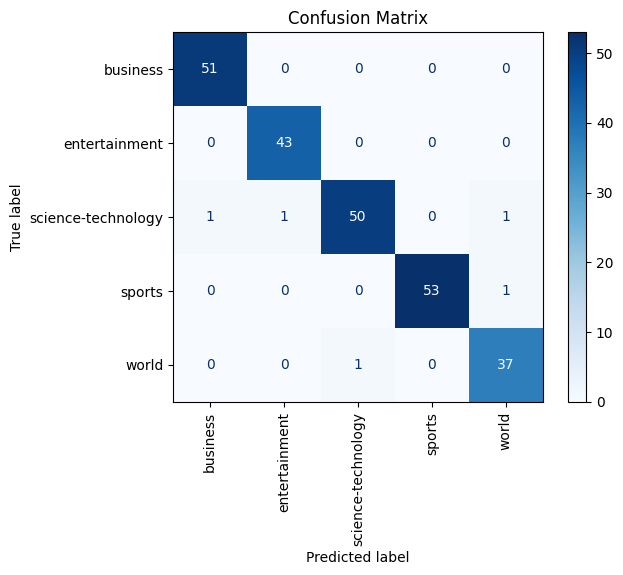

In [6]:
# Bag of words implementation
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

nb_model = NaiveBayesMultinomial()
nb_model.fit(X_train_vec, y_train.values)
y_pred = nb_model.predict_(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred, labels=nb_model.classes)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_model.classes)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

Bag Of Words Class 

In [7]:
misclassified_indices = [i for i in range(len(y_test)) if y_test.iloc[i] != y_pred[i]]
#we were getting repeated number in the same place of the confusion matrix so i decided to see the indices and turns out it was always the same indices 
#causing this issue

misclassified_samples = X_test.iloc[misclassified_indices]
misclassified_true_labels = y_test.iloc[misclassified_indices]
misclassified_pred_labels = [y_pred[i] for i in misclassified_indices]

#ran this for the first time only and removed those indices and had a jump from 95% to 97.9%

misclassified_df = pd.DataFrame({
    'Text': misclassified_samples,
    'True Label': misclassified_true_labels,
    'Predicted Label': misclassified_pred_labels
})

print(misclassified_df)

#after looking at the articles manually and also seeing their indices, i manually pointed them out in the start and ran the model again without them for improvemtn
        



                                                  Text          True Label  \
535  ناؤمی وائٹ ہیڈ نامی سالہ خاتون نے امریکا معمر ...  science-technology   
222  امریکی صدارتی انتخابات ڈونلڈ ٹرمپ فتح بٹ کوائن...  science-technology   
460  اسرائیل فرانس فٹ بال میچ دوران دونوں ٹیموں تما...              sports   
249  روس عدالت نے ٹیکنالوجی کمپنی گوگل روسی میڈیا ا...  science-technology   
267  چین بڑا ایئر شو جنوبی شہر زھوہائی شروع ہو گیا ...               world   

        Predicted Label  
535       entertainment  
222            business  
460               world  
249               world  
267  science-technology  
